Code for drawing graph animation

In [4]:
%matplotlib inline
from network_utilities import adjacency_matrix_to_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Tuple
from IPython import display

## Code for updating a Jupyter notebook plot in realtime
## is from google AI overview from prompt
## "jupyter notebook update plot in loop"

## All code assumes nodes are consecutive integers from 0 to some max number

desired_num_vertices: int = 30

def _get_initial_positions(desired_num_vertices: int) -> Tuple[nx.Graph, dict[int, tuple[float, float]]]:
    # Put all the vertices around a circle
    A: np.array = np.zeros((desired_num_vertices,desired_num_vertices))
    G = adjacency_matrix_to_graph(A)
    pos = nx.circular_layout(G)
    return G, pos

def _configure_plot(pos: dict[int, tuple[float,float]]) -> None:
    ax = plt.gca()
    x_positions: list[float] = [x for x,_ in pos.values()]
    y_positions: list[float] = [y for _,y in pos.values()]
    ax.set_xlim(min(x_positions)-.1, max(x_positions)+.1)
    ax.set_ylim(min(y_positions)-.1, max(y_positions)+.1)
    ax.set_aspect('equal')

def _update_plot(G: nx.Graph, 
                 pos: dict[int, tuple[float, float]], 
                 vertex_set: set[int], 
                 edge_set: set[tuple[int,int]]) -> None:
    desired_node_size = 200
    G.add_edges_from(edge_set)
    nx.draw_networkx_nodes(G, pos, 
                        nodelist = list(vertex_set),
                        node_color=['lightblue'],
                        node_size=desired_node_size,
                        alpha=0.8)
    nx.draw_networkx_edges(G,pos,edgelist=list(edge_set),width=0.5)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.5)


Functions for you to define

In [5]:
def add_edges_wikipedia_version(vertex_set: set[int], 
               new_vertex: int, 
               G: nx.Graph) -> set[tuple[int,int]]:
    new_edges: set[tuple[int,int]] = set()
    
    #Grace's Code:
    total_degree: int = sum(G.degree(n) for n in vertex_set)
    if total_degree == 0:
        return new_edges
    
    for vertex in vertex_set:
        k_i: int = G.degree(vertex)
        p_i: float = k_i / total_degree
        if np.random.random() < p_i:
            new_edges.add((new_vertex, vertex))
    #----------------
    return new_edges

"""
Initalizes with a network of m_0 >= m nodes

At each step:
    add one new node
    Sampele m neighbors among the existing vertices from the network with a
    probability proportional to their degree

"""

'\nInitalizes with a network of m_0 >= m nodes\n\nAt each step:\n    add one new node\n    Sampele m neighbors among the existing vertices from the network with a\n    probability proportional to their degree\n\n'

In [6]:
def add_edges_networkx_version(vertex_set: set[int], 
               new_vertex: int, 
               G: nx.Graph,
               required_edges: int = 1) -> set[tuple[int,int]]:
    new_edges: set[tuple[int,int]] = set()
    if required_edges < 1:
        raise ValueError("must have at least one required edge")
    
    #Grace's Code:
    vertices: list[int] = list(vertex_set)
    #----------------

    while len(new_edges) < required_edges:
        #Grace's code:
        total_degree: int = sum(G.degree(n) for n in vertex_set)
        if total_degree == 0:
            vertex = np.random.choice(vertices)
        else: 
            probs: np.ndarray = np.array([G.degree(n)/total_degree for n in vertices])
            vertex = np.random.choice(vertices, p=probs)
        new_edges.add((new_vertex, vertex))
        #---------
    return new_edges
#Add at least one edge to every vertex (keep giving the new
#vertex a chance to add an edge until the required number of edges are added)


Wikipedia version

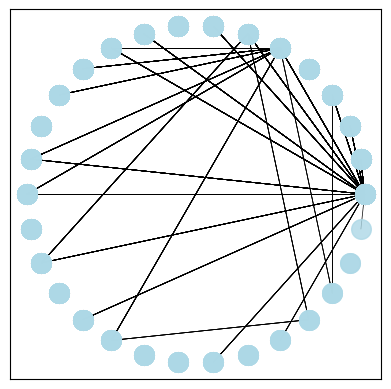

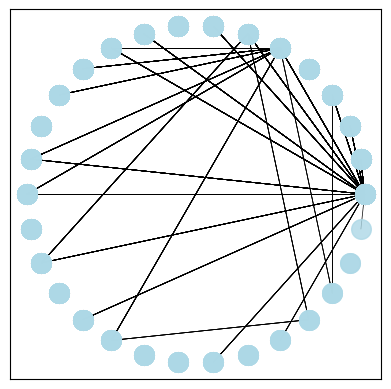

In [7]:
# Initialize drawing
G, pos = _get_initial_positions(desired_num_vertices)
_configure_plot(pos)

# m0 in the wikipedia article on Barabasi Albert network
vertex_set: set[int] = {0,1} 

edge_set: set[tuple[int,int]] = {(0,1)}
degree_dict: dict[int,int] = {0:1, 1:1}

# Add edges
while len(vertex_set) <= desired_num_vertices:
    _update_plot(G, pos, vertex_set, edge_set)
    new_vertex = len(vertex_set)
    new_edges = add_edges_wikipedia_version(vertex_set, new_vertex, G)
    vertex_set.add(new_vertex)
    edge_set.update(new_edges)

Networkx version

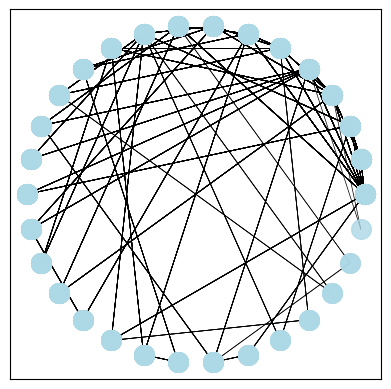

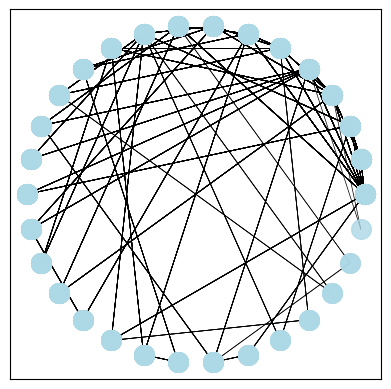

In [8]:
# Initialize drawing
G, pos = _get_initial_positions(desired_num_vertices)
_configure_plot(pos)

# m0 in the wikipedia article on Barabasi Albert network
vertex_set: set[int] = {0,1}
edge_set: set[tuple[int,int]] = {(0,1)}
degree_dict: dict[int,int] = {0:1, 1:1}

# Add edge
while len(vertex_set) <= desired_num_vertices:
    _update_plot(G, pos, vertex_set, edge_set)
    new_vertex = len(vertex_set)
    new_edges = add_edges_networkx_version(vertex_set, new_vertex, G, required_edges=2)
    vertex_set.add(new_vertex)
    edge_set.update(new_edges)


=== Wikipedia version: m0=2 ===


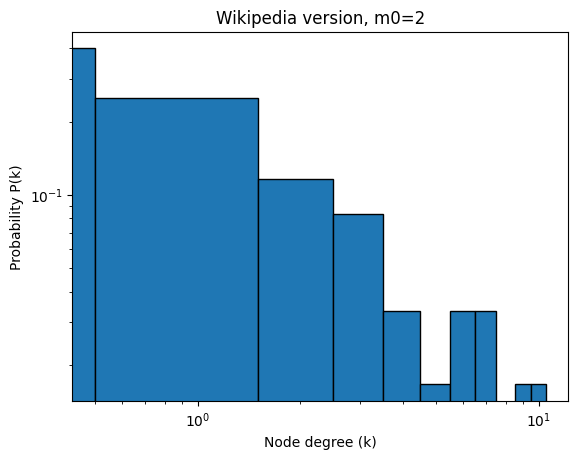


=== Wikipedia version: m0=3 ===


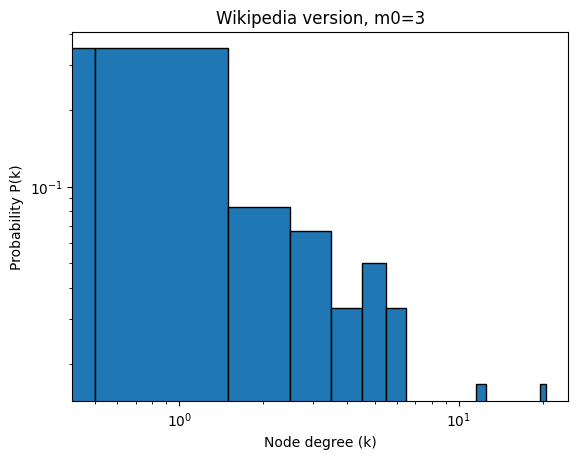


=== Wikipedia version: m0=5 ===


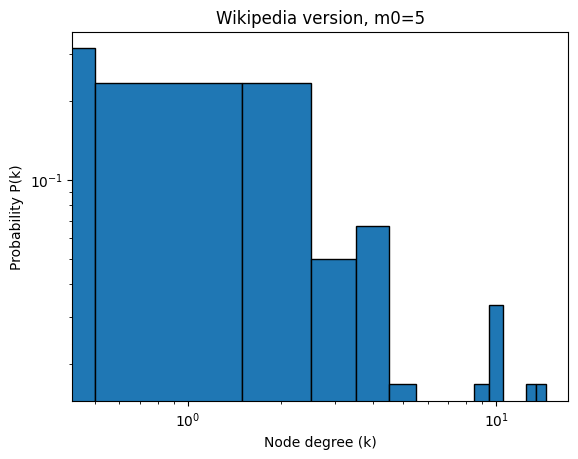


=== Wikipedia version: m0=10 ===


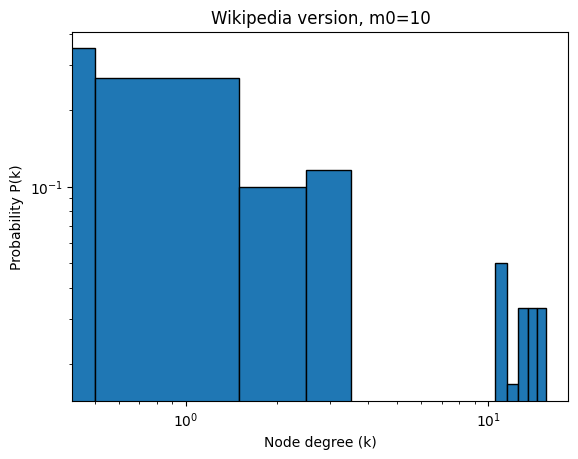


=== NetworkX version: m0=2, required_edges=2 ===


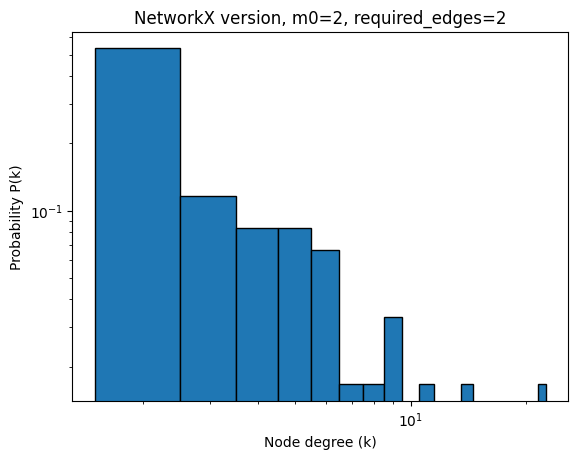


=== NetworkX version: m0=3, required_edges=2 ===


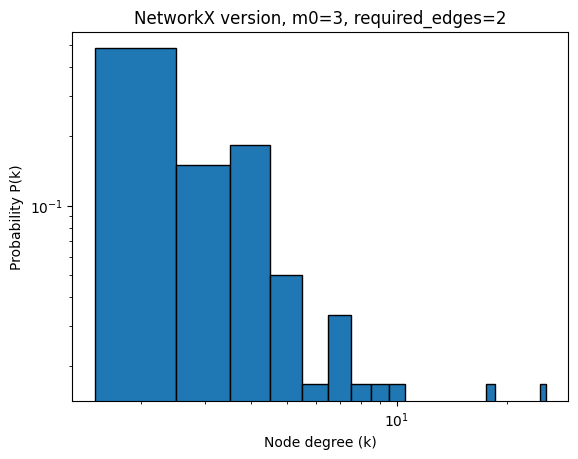


=== NetworkX version: m0=5, required_edges=2 ===


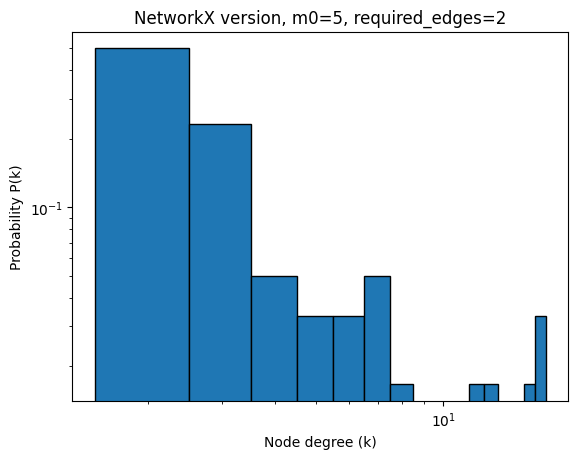


=== NetworkX version: m0=10, required_edges=2 ===


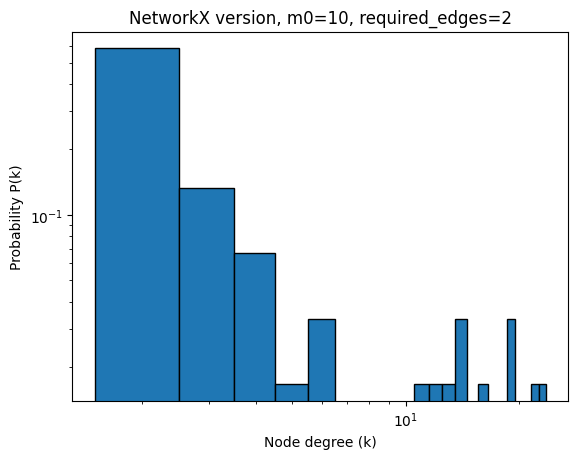

In [ ]:
def plot_degree_histogram(G: nx.Graph, title: str) -> None:
    degrees = [G.degree(n) for n in G.nodes()]
    bins = np.arange(min(degrees), max(degrees)+2) - 0.5

    plt.figure()
    plt.hist(degrees, bins=bins, density=True, edgecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Node degree (k)')
    plt.ylabel('Probability P(k)')
    plt.title(title)
    plt.show()

num_vertices = 60
m0_values = [2, 3, 5, 10]

for m0 in m0_values:
    print(f"\n=== Wikipedia version: m0={m0} ===")
    G = nx.complete_graph(m0)
    
    while len(G) < num_vertices:
        new_vertex = len(G)
        existing_nodes = set(G.nodes())
        new_edges = add_edges_wikipedia_version(existing_nodes, new_vertex, G)
        G.add_node(new_vertex)
        G.add_edges_from(new_edges)
    
    plot_degree_histogram(G, f"Wikipedia version, m0={m0}")

required_edges = 2

for m0 in m0_values:
    print(f"\n=== NetworkX version: m0={m0}, required_edges={required_edges} ===")
    G = nx.complete_graph(m0)
    while len(G) < num_vertices:
        new_vertex = len(G)
        existing_nodes = set(G.nodes())
        new_edges = add_edges_networkx_version(existing_nodes, new_vertex, G, required_edges=required_edges)
        G.add_node(new_vertex)
        G.add_edges_from(new_edges)
    
    plot_degree_histogram(G, f"NetworkX version, m0={m0}, required_edges={required_edges}")



=== Wikipedia version: m0=2 ===


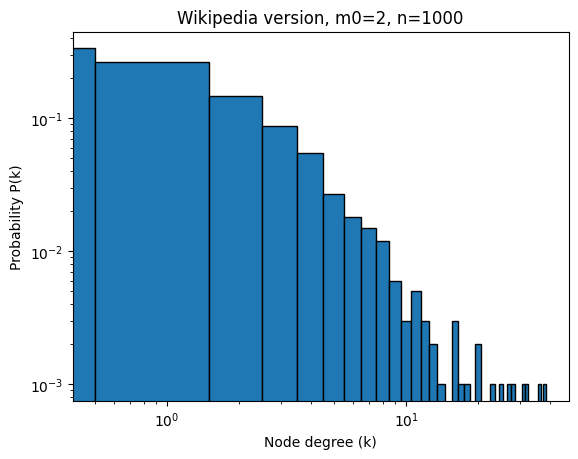


=== Wikipedia version: m0=3 ===


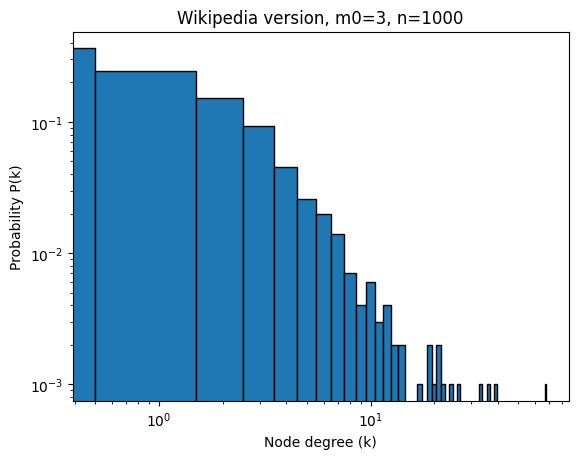


=== Wikipedia version: m0=5 ===


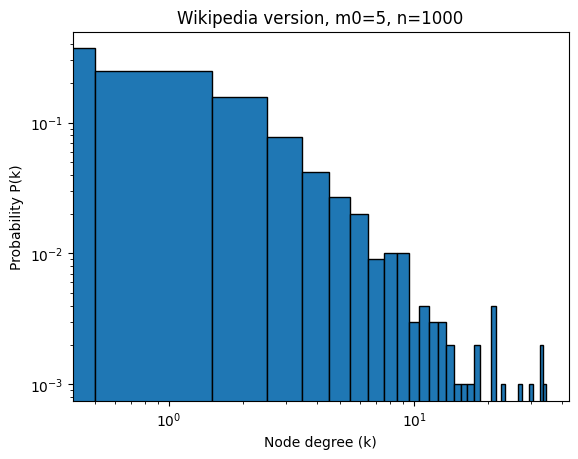


=== Wikipedia version: m0=10 ===


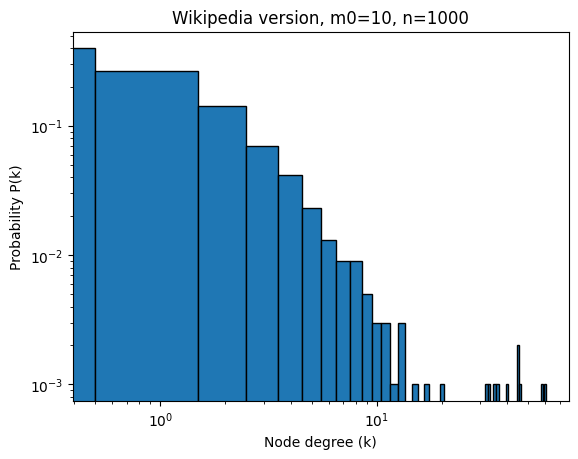


=== NetworkX version: m0=2, required_edges=2 ===


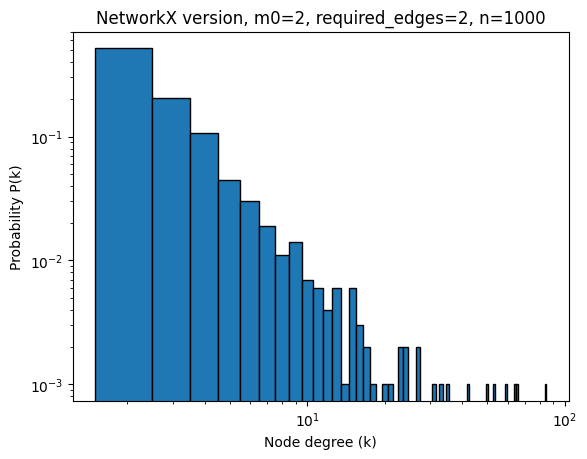


=== NetworkX version: m0=3, required_edges=2 ===


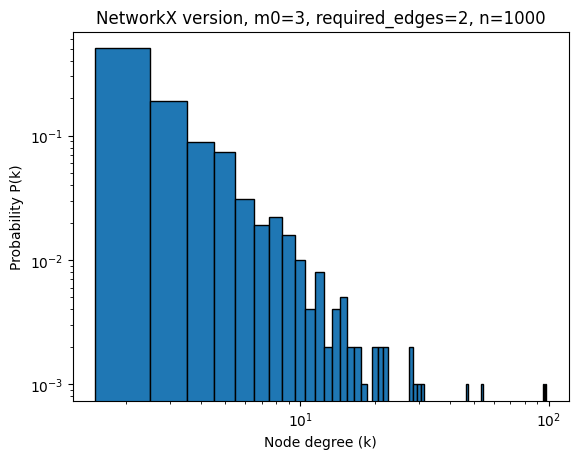


=== NetworkX version: m0=5, required_edges=2 ===


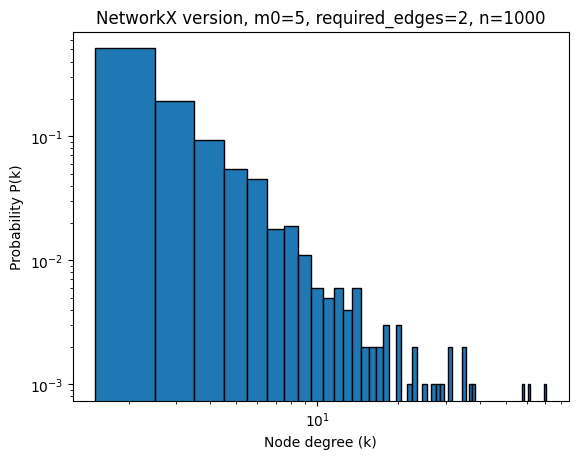


=== NetworkX version: m0=10, required_edges=2 ===


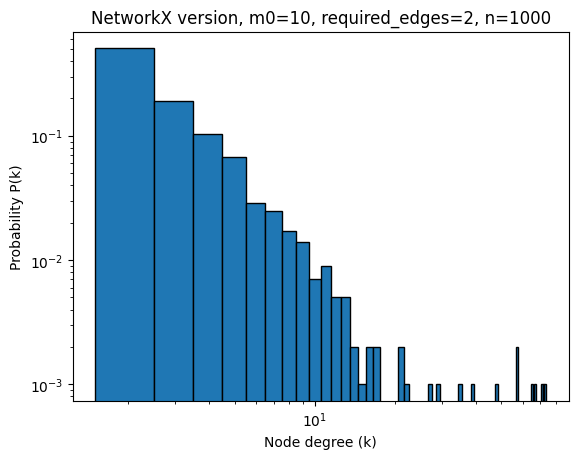

In [15]:
#SUPER Large (just copied from cell above but increased the vertices by A LOT)
num_vertices = 1000
m0_values = [2, 3, 5, 10]

# --- Wikipedia Version ---
for m0 in m0_values:
    print(f"\n=== Wikipedia version: m0={m0} ===")
    G = nx.complete_graph(m0)
    
    while len(G) < num_vertices:
        new_vertex = len(G)
        existing_nodes = set(G.nodes())
        new_edges = add_edges_wikipedia_version(existing_nodes, new_vertex, G)
        G.add_node(new_vertex)
        G.add_edges_from(new_edges)
    
    plot_degree_histogram(G, f"Wikipedia version, m0={m0}, n={num_vertices}")

# --- NetworkX Version ---
required_edges = 2

for m0 in m0_values:
    print(f"\n=== NetworkX version: m0={m0}, required_edges={required_edges} ===")
    G = nx.complete_graph(m0)
    
    while len(G) < num_vertices:
        new_vertex = len(G)
        existing_nodes = set(G.nodes())
        new_edges = add_edges_networkx_version(existing_nodes, new_vertex, G, required_edges=required_edges)
        G.add_node(new_vertex)
        G.add_edges_from(new_edges)
    
    plot_degree_histogram(G, f"NetworkX version, m0={m0}, required_edges={required_edges}, n={num_vertices}")